
# **Домашняя работа по ТВИМС** 

## Учебный ноутбук, на котором пояснялась работа библиотеки pymc3

---

### **Выполнил**:  
**Вольхин Данил Федорович**

### **Email**:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

### **Дата**:  
**18 октября 2024**

---

😊 Первый раз запускаем пайтон 😊

In [1]:
# ANSI коды для цветов текста
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

# Импорт библиотек

In [2]:
# Импорт библиотек
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")
import os

# Установите путь к библиотеке cuDNN
os.environ['THEANO_FLAGS'] = 'dnn.base_path="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.8"'

import sys
import platform
from copy import deepcopy
print(f"python: {GREEN}{platform.python_version()}{RESET} ")
import arviz as az
print(f"arviz: {GREEN}{az.__version__}{RESET} ")
import matplotlib
import matplotlib.pyplot as plt
print(f"matplotlib: {GREEN}{matplotlib.__version__}{RESET}")
import numpy as np
print(f"numpy: {GREEN}{np.__version__}{RESET}")
import pandas as pd
print(f"pandas: {GREEN}{pd.__version__}{RESET}")
import pymc3 as pm
print(f"pymc3: {GREEN}{pm.__version__}{RESET} ")
import seaborn as sns
print(f"seaborn: {GREEN}{sns.__version__}{RESET}")
from IPython.display import Markdown, display
import theano.tensor as tt
print(f"{YELLOW}"+60*"-"+f"{RESET}")
# Функция для загрузки данных из ВОЗ
from covid.data import load_covid_data, get_country_data
print(f"Кастомные функции: \n")
print(f"{BLUE}load_covid_data{RESET}")
print(f"{BLUE}get_country_data{RESET}")
print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.6.15 
arviz: 0.11.1 
matplotlib: 3.3.4
numpy: 1.19.5
pandas: 1.1.5


C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\theano\gpuarray\dnn.py:196: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  "Your cuDNN version is more recent than "
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\theano\gpuarray\__init__.py", line 263, in <module>
    use(config.device)
  File "C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\theano\gpuarray\__init__.py", line 250, in use
    init_dev(device, preallocate=preallocate)
  File "C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\theano\gpuarray\__init__.py", line 136, in init_dev
    context.cudnn_handle = dnn._make_handle(context)
  File "C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\theano\gpuarray\dnn.py", line 124, in _make_handle
    cudnn = _dnn_li

pymc3: 3.10.0 
seaborn: 0.11.2
------------------------------------------------------------
Кастомные функции: 

load_covid_data
get_country_data
------------------------------------------------------------


# Задаем параметры

In [3]:
az.style.use("arviz-darkgrid")

def sampler_kwargs(
    chains: int = 1,
    cores: int = 1,
    return_inferencedata: bool = True,
    tune: int = None,
    draws: int = None
):
    if tune is None and draws is None:
        return {
            "chains": 1,
            "cores": 1,
            "return_inferencedata": return_inferencedata,
            "random_seed": 42,
        }
    else:
        return {
            "chains": 1,
            "cores": 1,
            "return_inferencedata": return_inferencedata,
            "random_seed": 42,
            "tune": tune,
            "draws": draws
        }

# Загрузка данных

Данных из лекции нет, поэтому попытаюсь скачать общие данные для всех стран из ВОЗ и попробую загрузить оттуда. \
Вот ссылка на данные, которые использовал: [Данные](https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-daily-data.csv "Daily COVID-19 cases and deaths by date reported to WHO")

Изначально в ноутбуке импортировалась функция load_covid_data, которая нигде не была имплементирована, поэтому загрузим данные по своему. \
*df = load_covid_data.load_data(drop_states=True, filter_n_days_100=2)*

In [4]:
file_path = "./data/WHO-COVID-19-global-daily-data.csv"
df = load_covid_data(file_path, drop_states=False, filter_n_days_100=2)
df.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,days_since_100
20733,2020-03-30,Afghanistan,15,106,106,3,0
21028,2020-03-31,Afghanistan,8,114,114,4,1
21213,2020-04-01,Afghanistan,52,166,166,4,2
21506,2020-04-02,Afghanistan,26,192,192,4,3
21692,2020-04-03,Afghanistan,2,194,194,4,4


In [5]:
# Получаем уникальные страны
countries = df['Country'].unique()
n_countries = len(countries)
print(f"{RED}{n_countries}{RESET}")
print(countries)

230
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czechia' "Côte d'Ivoire" 'Democratic Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' '

# Пайплайн работы

Здесь умный мужчина обьяснял, что моделирование можно разбить на повторящийся список пукнтов:

1. Графически отобразить данные
2. Построить первую модель
3. Запустить проверку априроного предсказания
4. Обучить модель
5. Оценить сходимость
6. Запустить проверку апостериорного предсказания
7. В зависимости от того, что получили, внести в модель корректировки для ее улучшения

## 1. Графическое отображение данных

Ну вот как раз сейчас пройдемся по всем пунктам. \
В лекции было уделено внимание пропуску первых 100 дней, как пояснялось из-за шума. \
Так как мы патриоты будем смотреть на данные по России.

In [6]:
# Выбор данных по конкретной стране
country = "Russian Federation"
df_country = get_country_data(df, country, 1500)

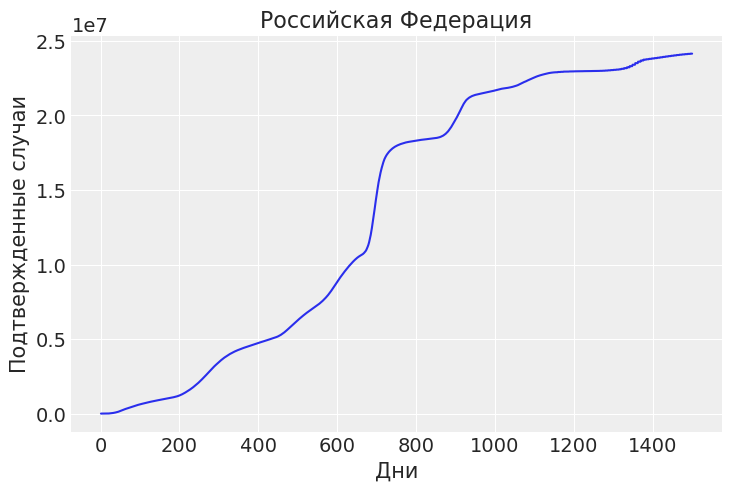

In [7]:
# Построение графика
fig, ax = plt.subplots()
df_country['Cumulative_cases'].plot(ax=ax)
# Настройка осей и заголовка
ax.set(ylabel="Подтвержденные случаи", title="Российская Федерация")
ax.set(xlabel="Дни")
# Удаление лишних осей с помощью Seaborn
sns.despine()
# Отображение графика
plt.show()

In [8]:
df_country.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
days_since_100,,,,,,
1,2020-03-19,Russian Federation,54,147,147,0
2,2020-03-20,Russian Federation,52,199,199,0
3,2020-03-21,Russian Federation,54,253,253,0
4,2020-03-22,Russian Federation,53,306,306,0
5,2020-03-23,Russian Federation,132,438,438,0


## 2. Построение модели

Вышеприведенная линия выглядит как экспоненциальная. Это соответствует знаниям из эпидемиологии, где на ранних стадиях эпидемии она растет экспоненциально.

In [9]:
# Инициализация модели
t = df_country.index.values[:30]
confirmed = df_country['Cumulative_cases'].values[:30]

with pm.Model() as model_exp1:
    # Intercept
    a = pm.Normal("a", mu=0, sigma=100)

    # Slope
    b = pm.Normal("b", mu=0.3, sigma=0.3)

    # Exponential regression
    growth = a * (1 + b) ** t

    # Error term
    eps = pm.HalfNormal("eps", 100)

    # Likelihood
    pm.Normal("obs", mu=growth, sigma=eps, observed=confirmed)

## 3. Запустить проверку априроного предсказания

Даже не подгоняя модель к нашим данным, мы генерируем новые потенциальные данные на основе наших предыдущих. Обычно у нас меньше интуиции относительно пространства параметров, где мы определяем наши априорные значения, и больше интуиции относительно того, какие данные мы можем ожидать увидеть. Таким образом, предварительная прогнозирующая проверка позволяет нам убедиться, что модель может генерировать те типы данных, которые мы ожидаем увидеть.

Процесс работает следующим образом:

1. Выберите точку из предыдущего $\theta_i$
2. Сгенерируйте набор данных $x_i \sim f(\theta_i)$, где $f$ — наша функция правдоподобия (например, нормальная).
3. Промойте и повторите $n$ раз.

In [10]:
# Получаем приорные предсказания
with model_exp1:
    prior_pred = pm.sample_prior_predictive()

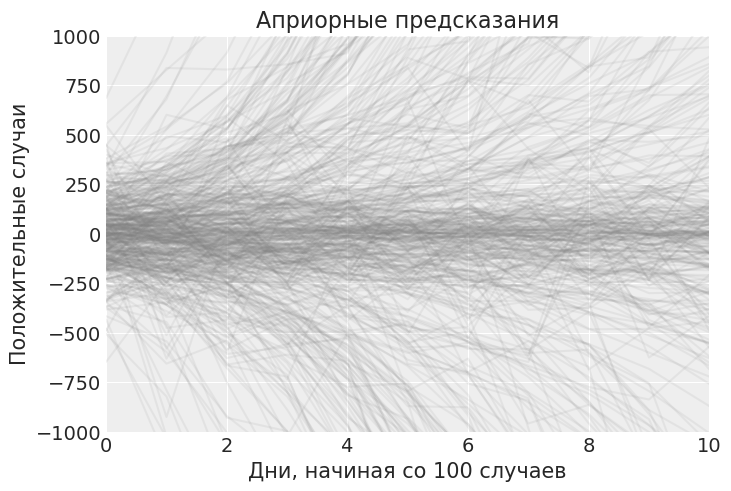

In [11]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    ylim=(-1000, 1000),
    xlim=(0, 10),
    title="Априорные предсказания",
    xlabel="Дни, начиная со 100 случаев",
    ylabel="Положительные случаи",
);

In [12]:
# Инференс модели
with model_exp1:
    _kwargs = sampler_kwargs()
    trace = pm.sample(**_kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [eps, b, a]


ValueError: Mass matrix contains zeros on the diagonal. 
The derivative of RV `eps_log__`.ravel()[0] is zero.

При работе с байесовскими моделями вы, скорее всего, часто будете сталкиваться с этими загадочными сообщениями об ошибках. Из предыдущей лекции некоторые из этих терминов должны показаться вам знакомыми. Судя по всему, на диагонали *массовой матрицы* есть нули. Если вы помните, матрица масс используется для определения *кинетической энергии*. Эта матрица оценивается на этапе настройки на основе собранных нами образцов.  

Что-то пошло не так в процессе настройки. Иногда полезно взглянуть на короткий след, который не дал сбоя.

In [13]:
with model_exp1:
    _kwargs = sampler_kwargs(tune=0, draws=500)
    trace = pm.sample(**_kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [eps, b, a]


Sampling 1 chain for 0 tune and 500 draw iterations (0 + 500 draws total) took 0 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\stats\density_utils.py:770: UserWarning: Something failed when estimating the bandwidth. Please check your data
  warnings.warn("Something failed when estimating the bandwidth. Please check your data")


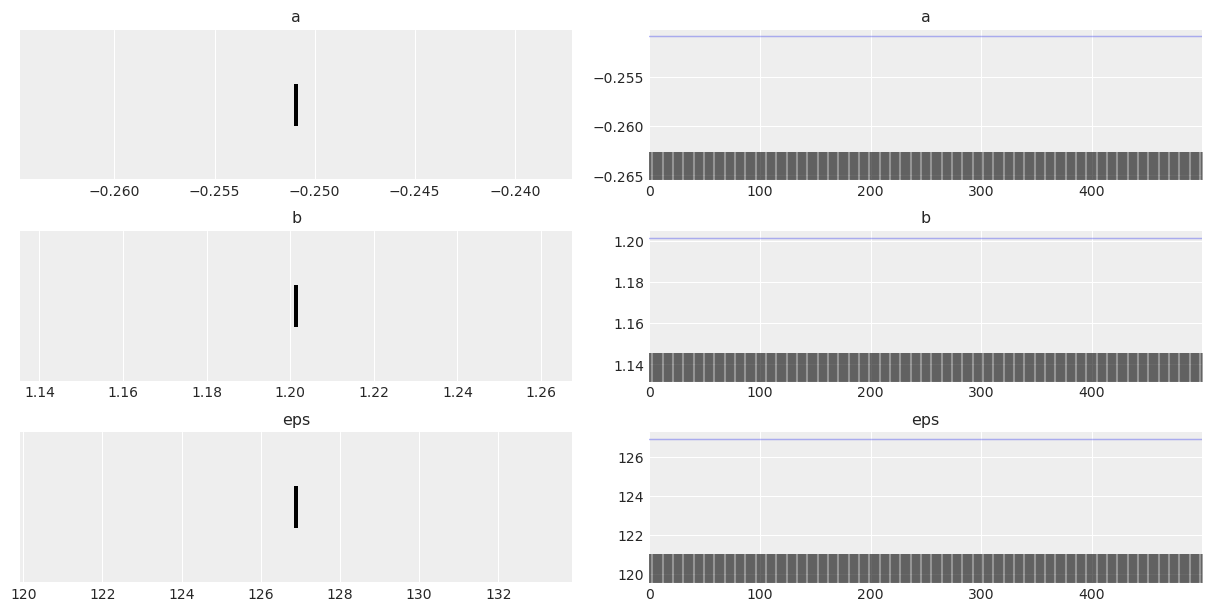

In [14]:
az.plot_trace(trace);

Как видите, след представляет собой просто плоскую линию. Это означает, что сэмплер не делает никаких движений. Итак, когда вы попытаетесь вычислить (диагональную) ковариационную матрицу на основе этого, дисперсия будет равна нулю, что объясняет сообщение об ошибке.

Во время выборки мы также получили сообщение об ошибке, что имеются только разные выборки и что наша модель, вероятно, определена неверно.

Это подводит нас к «Народной теореме статистических вычислений» Гельмана:

> Если у вас возникли проблемы с выборкой, скорее всего, у вас плохая модель.

Обратите внимание: хотя эти ошибки могут раздражать, это огромное преимущество: **Пробоотборник хочет сообщить вам, что ваша модель определена неверно.** Это намного превосходит альтернативу, в которой вы можете использовать модель машинного обучения, которая не подходит. что-нибудь разумное, но все равно подходит.

### Что не так с этой моделью?

Надеемся, что выше вы выявили несколько проблем с этой моделью:
1. Случаи не могут быть отрицательными
2. Выявленные случаи не могут начинаться с 0, так как мы установили, что они должны начинаться с числа выше 100.
3. Число положительных случаев не может снизиться, потому что мы находимся в начале эпидемии.

Давайте улучшим это. То, что число случаев становится отрицательным, связано с тем, что мы используем нормальное правдоподобие. Вместо этого давайте использовать *Отрицательный бином*, который похож на *Пуассон*, который обычно используется для подсчета данных, но имеет дополнительный параметр дисперсии, который обеспечивает большую гибкость в моделировании дисперсии данных (см. переподготовка).

Мы также изменим априор точки пересечения так, чтобы он был по центру 100, и уменьшим априор наклона.

In [15]:
t = df_country.index.values[:30]
confirmed = df_country['Cumulative_cases'].values[:30]

with pm.Model() as model_exp2:
    # Intercept
    a = pm.Normal("a", mu=100, sigma=25)

    # Slope
    b = pm.Normal("b", mu=0.3, sigma=0.1)

    # Exponential regression
    growth = a * (1 + b) ** t

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed
    )

In [16]:
# Получаем приорные предсказания
with model_exp2:
    prior_pred = pm.sample_prior_predictive()

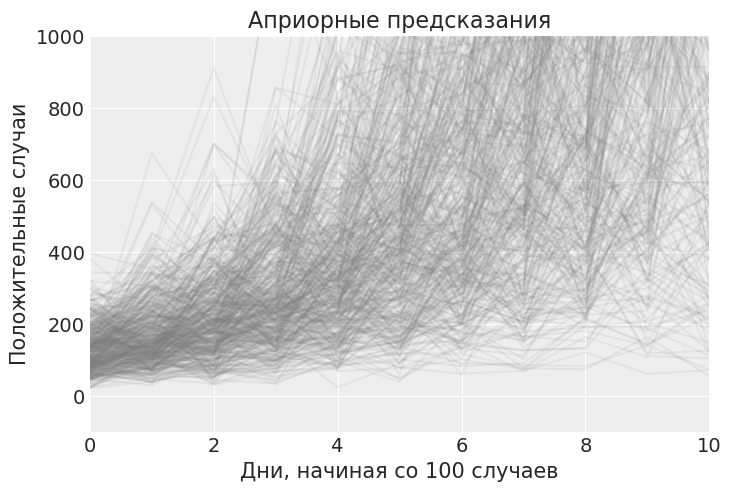

In [17]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    ylim=(-100, 1000),
    xlim=(0, 10),
    title="Априорные предсказания",
    xlabel="Дни, начиная со 100 случаев",
    ylabel="Положительные случаи",
);

In [18]:
# Инференс
with model_exp2:
    _kwargs = sampler_kwargs()
    trace_exp2 = pm.sample(**_kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [19]:
df_country.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
days_since_100,,,,,,
1,2020-03-19,Russian Federation,54,147,147,0
2,2020-03-20,Russian Federation,52,199,199,0
3,2020-03-21,Russian Federation,54,253,253,0
4,2020-03-22,Russian Federation,53,306,306,0
5,2020-03-23,Russian Federation,132,438,438,0


Это выглядит намного лучше. Однако мы можем включить еще больше предварительной информации. Например, мы знаем, что перехват *не может* быть ниже 100 из-за того, как мы нарезали данные. Таким образом, мы можем создать априорное значение, масса вероятности которого не будет ниже 100. Для этого мы используем класс PyMC3 «TruncatedNormal», который может добавлять произвольную нижнюю и верхнюю границу к нормальному распределению вероятностей. Мы можем применить то же самое к наклону, который, как мы знаем, не будет отрицательным.

In [20]:
t = df_country.index.values[:30]
confirmed = df_country['Cumulative_cases'].values[:30]

with pm.Model() as model_exp3:
    # Intercept
    a = pm.TruncatedNormal("a", mu=100, sigma=25, lower=100)

    # Slope
    b = pm.TruncatedNormal("b", mu=0.3, sigma=0.1, lower=0)

    # Exponential regression
    growth = a * (1 + b) ** t

    growth = tt.minimum(growth, 1e9)

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed
    )

In [21]:
# Получаем приорные предсказания
with model_exp3:
    prior_pred = pm.sample_prior_predictive()

In [22]:
# Конвертируем в az
prior_pred_az = az.from_pymc3(prior=prior_pred)

C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


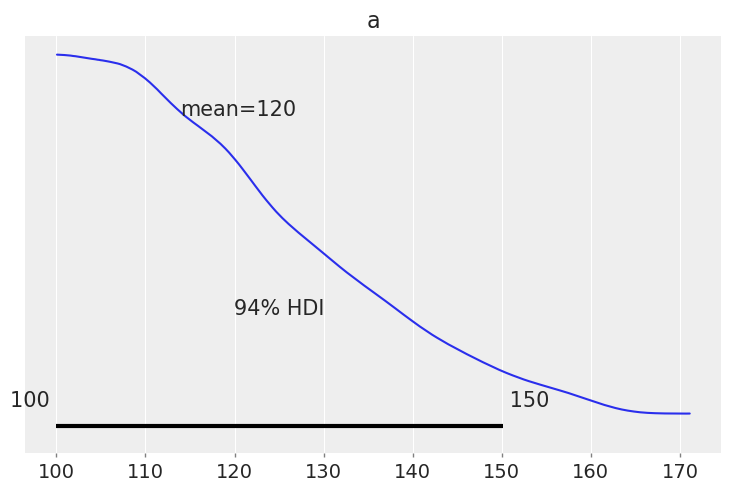

In [23]:
az.plot_posterior(prior_pred_az, group="prior", var_names="a");

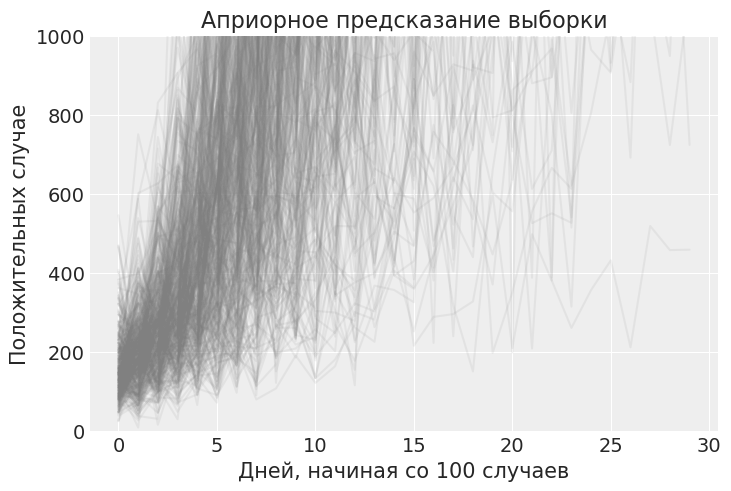

In [24]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    ylim=(0, 1000),
    title="Априорное предсказание выборки",
    xlabel="Дней, начиная со 100 случаев",
    ylabel="Положительных случае",
);

Обратите внимание: хотя сейчас параметр перехвата не может быть ниже 100, мы все равно видим данные, сгенерированные при значении ниже ста. Почему?

## 4. Обучение модели

In [25]:
with model_exp3:
    _kwargs = sampler_kwargs(return_inferencedata=False)
    trace_exp3 = pm.sample(**_kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


## 5. Оценка конвергенции

C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


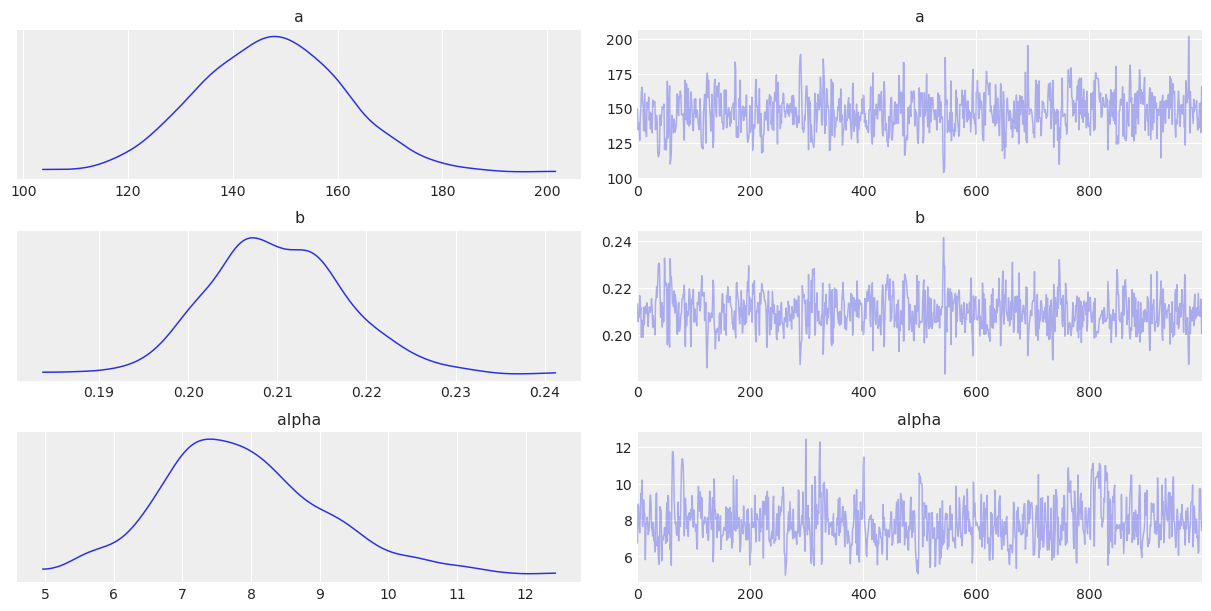

In [26]:
az.plot_trace(trace_exp3);

In [27]:
az.summary(trace_exp3, round_to=2)

C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,147.33,13.91,121.59,172.83,0.67,0.47,431.37,431.37,424.80,461.43,NaN
b,0.21,0.01,0.20,0.22,0.00,0.00,499.14,492.32,509.64,486.44,NaN
alpha,7.88,1.20,5.49,9.98,0.07,0.06,257.86,234.63,307.46,179.04,NaN


C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


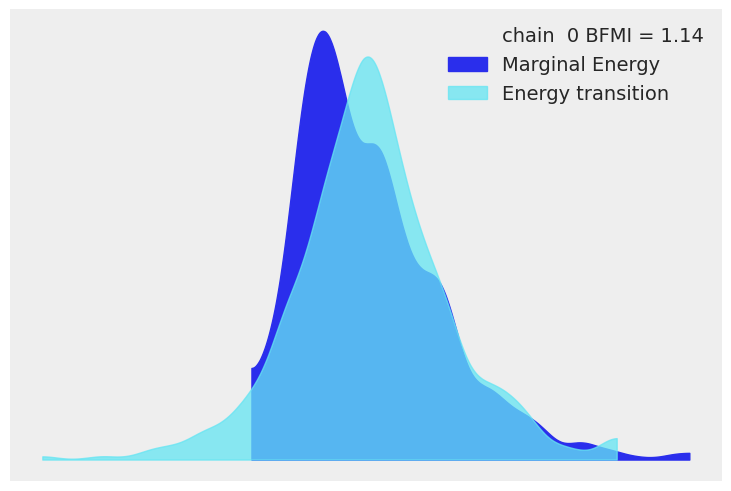

In [28]:
az.plot_energy(trace_exp3);

### Сравнение моделей

Давайте быстро сравним две модели, из которых нам удалось выбрать:

In [29]:
az.compare({"exp2": trace_exp2, "exp3": trace_exp3}).round(2)

C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\stats\stats.py:147: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
exp3,0,-240.81,0.51,0.00,1.0,8.69,0.00,False,log
exp2,1,-240.85,0.56,0.04,0.0,8.69,0.02,False,log


Похоже, что ограничение приоров не привело к улучшению соответствия. В этом нет ничего неожиданного, поскольку наше изменение в предшествующих данных было очень небольшим. Мы по-прежнему продолжим использовать model_exp3, поскольку у нас есть предварительная информация о том, что эти параметры ограничены таким образом.

### 6. Запуск апостериорного прогноза

Подобно априорному прогнозированию, мы также можем генерировать новые данные, неоднократно беря образцы из апостериорных данных и генерируя данные с использованием этих параметров.

In [30]:
with model_exp3:
    # Draw samples from posterior predictive
    post_pred = pm.sample_posterior_predictive(trace_exp3)
    trace_exp3 = az.from_pymc3(posterior_predictive=post_pred)

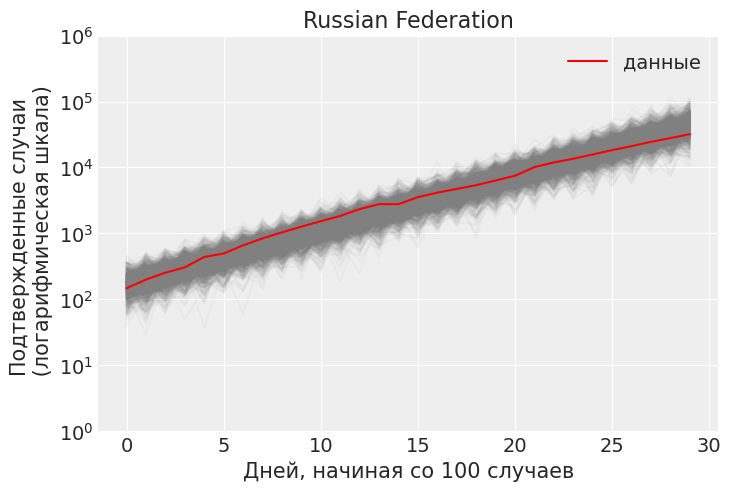

In [31]:
fig, ax = plt.subplots()
ax.plot(trace_exp3.posterior_predictive["obs"].values.squeeze().T, color="0.5", alpha=0.05)
ax.plot(confirmed, color="r", label="данные")
ax.set(
    xlabel="Дней, начиная со 100 случаев",
    ylabel="Подтвержденные случаи \n (логарифмическая шкала)",
    ylim=(1, 1_000_000),
    title=country,
    yscale="log",
)
ax.legend();

Хорошо, это не выглядит ужасно, данные по крайней мере находятся в пределах того, что может выдать модель. Давайте посмотрим на остатки для систематических ошибок:

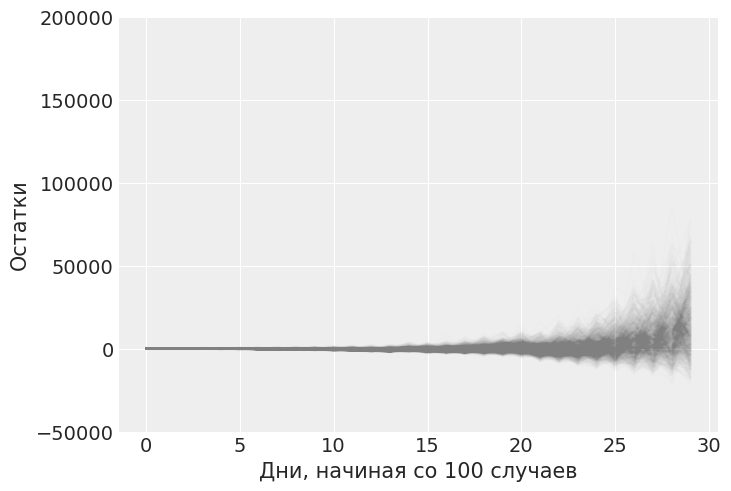

In [32]:
fig, ax = plt.subplots()
resid = trace_exp3.posterior_predictive["obs"].values.squeeze() - confirmed
ax.plot(resid.T, color="0.5", alpha=0.01)
ax.set(ylim=(-50_000, 200_000), ylabel="Остатки", xlabel="Дни, начиная со 100 случаев");

### Прогнозирование и составление прогнозов

Нам также может быть интересно прогнозирование на основе невидимых данных или, в случае данных временных рядов, как здесь, прогнозирование. В `PyMC3` вы можете легко сделать это с помощью `pm.Data`. Это позволяет вам определить данные в модели PyMC3, которую вы позже можете переключить на другие данные. Таким образом, когда вы, например, делаете апостериорную предиктивную выборку, она будет генерировать выборки в будущем, т. е. истинные прогнозы _вне выборки_.

Давайте изменим нашу модель, чтобы вместо этого использовать `pm.Data`:

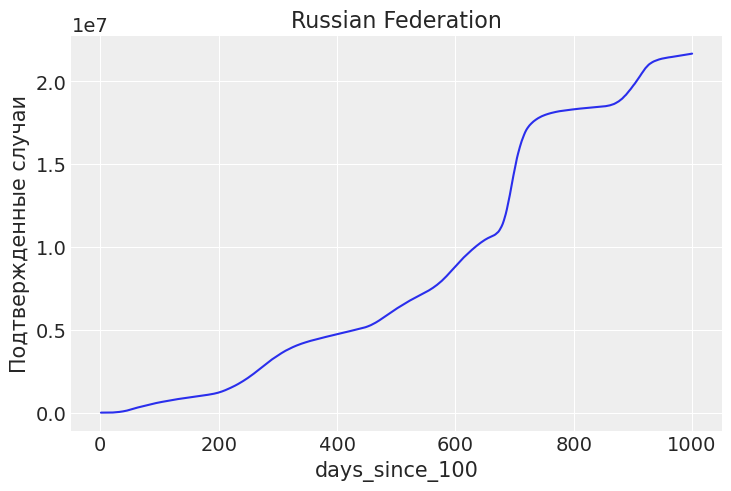

In [33]:
country = "Russian Federation"
df_country = get_country_data(df, country, 1500)
fig, ax = plt.subplots()
df_country['Cumulative_cases'][:1000].plot(ax=ax)
ax.set(ylabel="Подтвержденные случаи", title=country);

In [34]:
df_country.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
days_since_100,,,,,,
1,2020-03-19,Russian Federation,54,147,147,0
2,2020-03-20,Russian Federation,52,199,199,0
3,2020-03-21,Russian Federation,54,253,253,0
4,2020-03-22,Russian Federation,53,306,306,0
5,2020-03-23,Russian Federation,132,438,438,0


In [35]:
with pm.Model() as model_exp4:
    # pm.Data needs to be in the model context so that we can
    # keep track of it.
    # Then, we can then use it like any other array.
    t_data = pm.Data("t", df_country.index.values[:30])
    confirmed_data = pm.Data("confirmed", df_country.Cumulative_cases.values[:30])

    # Intercept with a reasonable upper bound
    a = pm.TruncatedNormal("a", mu=100, sigma=25, lower=100)

    # Slope
    b = pm.TruncatedNormal("b", mu=0.3, sigma=0.1, lower=0)

    # Exponential regression with a check for positivity
    growth = pm.math.switch(
        a * (1 + b) ** t_data > 0,
        a * (1 + b) ** t_data,
        pm.math.constant(1e-5)  # Small positive value if the condition fails
    )

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed_data
    )
    
    _kwargs = sampler_kwargs()
    trace_exp4 = pm.sample(**_kwargs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8923679314274234, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [36]:
with model_exp4:
    # pm.set_data({"t": np.arange(500), "confirmed": np.zeros(500, dtype="int")})
    trace_exp4 = az.from_pymc3(posterior_predictive=pm.sample_posterior_predictive(trace_exp4))

In [37]:
df_country.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
days_since_100,,,,,,
1,2020-03-19,Russian Federation,54,147,147,0
2,2020-03-20,Russian Federation,52,199,199,0
3,2020-03-21,Russian Federation,54,253,253,0
4,2020-03-22,Russian Federation,53,306,306,0
5,2020-03-23,Russian Federation,132,438,438,0


Поскольку ранее мы сдерживали данные, теперь мы можем увидеть, как прогнозы модели соотносятся с реальностью:

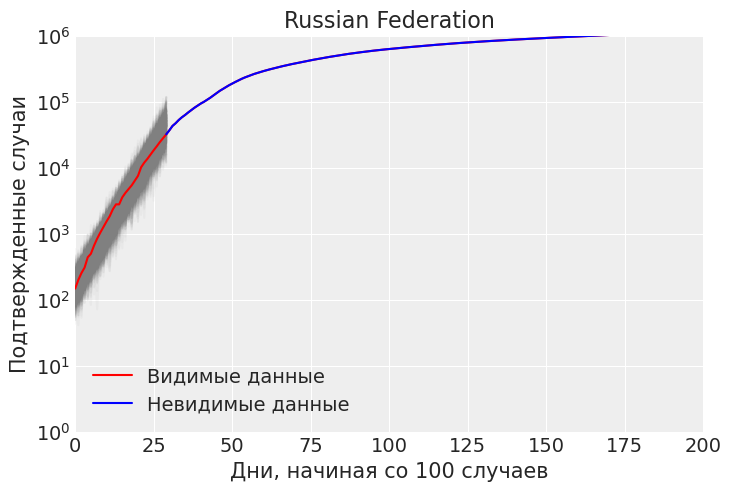

In [38]:
fig, ax = plt.subplots()

ax.plot(trace_exp4.posterior_predictive["obs"].values.squeeze().T, color="0.5", alpha=0.05)
ax.plot(df_country.Cumulative_cases.values, color="r", label="Видимые данные")

df_confirmed = df_country.loc[lambda x: (x['Country'] == country), "Cumulative_cases"]

ax.plot(
    np.arange(29, len(df_confirmed)),
    df_confirmed.iloc[29:].values,
    color="b",
    label="Невидимые данные",
)

ax.set(
    xlabel="Дни, начиная со 100 случаев",
    ylabel="Подтвержденные случаи",
    ylim=(1, 1_000_000),
    xlim=(0, 200),
    title=country,
    yscale="log",
)
ax.legend();

## 7. Улучшаем модель

### Логистическая модель

In [39]:
# Выбор данных по конкретной стране
country = "Russian Federation"
df_country_new = get_country_data(df, country, 1500)
df_confirmed_new = df_country_new.loc[lambda x: (x['Country'] == country), "Cumulative_cases"]

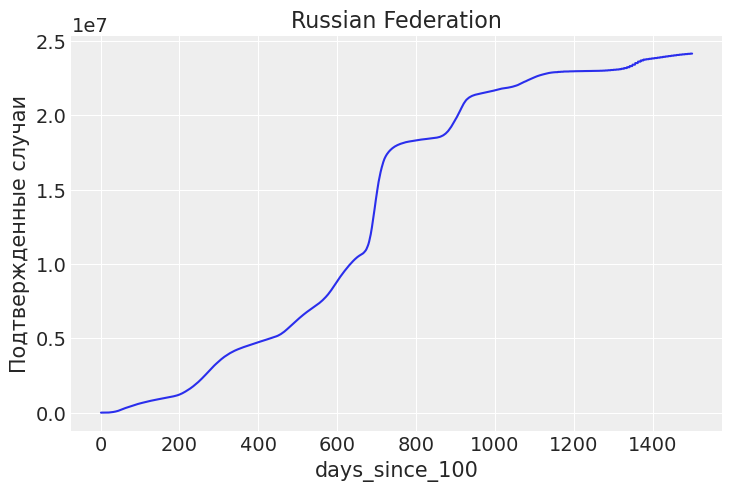

In [40]:
fig, ax = plt.subplots()
df_country_new['Cumulative_cases'].plot(ax=ax)
ax.set(ylabel="Подтвержденные случаи", title=country);

In [41]:
df_country_new

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
days_since_100,,,,,,
1,2020-03-19,Russian Federation,54,147,147,0
2,2020-03-20,Russian Federation,52,199,199,0
3,2020-03-21,Russian Federation,54,253,253,0
4,2020-03-22,Russian Federation,53,306,306,0
5,2020-03-23,Russian Federation,132,438,438,0
...,...,...,...,...,...,...
1496,2024-04-22,Russian Federation,14940,24147589,24147589,402774
1497,2024-04-23,Russian Federation,0,24147589,24147589,402774
1498,2024-04-24,Russian Federation,0,24147589,24147589,402774


In [42]:
with pm.Model() as logistic_model:
    
    t_data = pm.Data("t", df_country_new.index.values[:10])
    confirmed_data = pm.Data("confirmed", df_country_new.Cumulative_cases.values[:10])

    # Intercept
    intercept = pm.TruncatedNormal("a", mu=100, sigma=25, lower=100)

    # Slope
    b = pm.TruncatedNormal("b", mu=0.3, sigma=0.1, lower=0)

    carrying_capacity = pm.Uniform("carrying_capacity", lower=1_000, upper=140_000_000)
    # Transform carrying_capacity to a
    a = carrying_capacity / intercept - 1

    # Logistic
    growth = carrying_capacity / (1 + a * pm.math.exp(-b * t_data))

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed_data
    )

    prior_pred = pm.sample_prior_predictive()
    _kwargs = sampler_kwargs()
    trace_logistic = pm.sample(**_kwargs, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, carrying_capacity, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


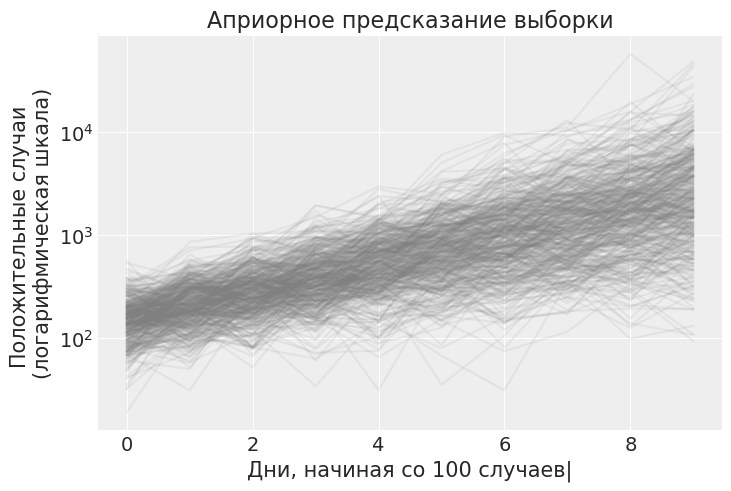

In [43]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    title="Априорное предсказание выборки",
    xlabel="Дни, начиная со 100 случаев|",
    ylabel="Положительные случаи \n(логарифмическая шкала)",
    yscale="log",
);

In [44]:
with logistic_model:
    pm.set_data({"t": np.arange(1500), "confirmed": np.zeros(1500, dtype="int")})
    post_pred = pm.sample_posterior_predictive(trace_logistic)
    # Sample posterior predcitive
    azz = az.from_pymc3(posterior_predictive=post_pred)

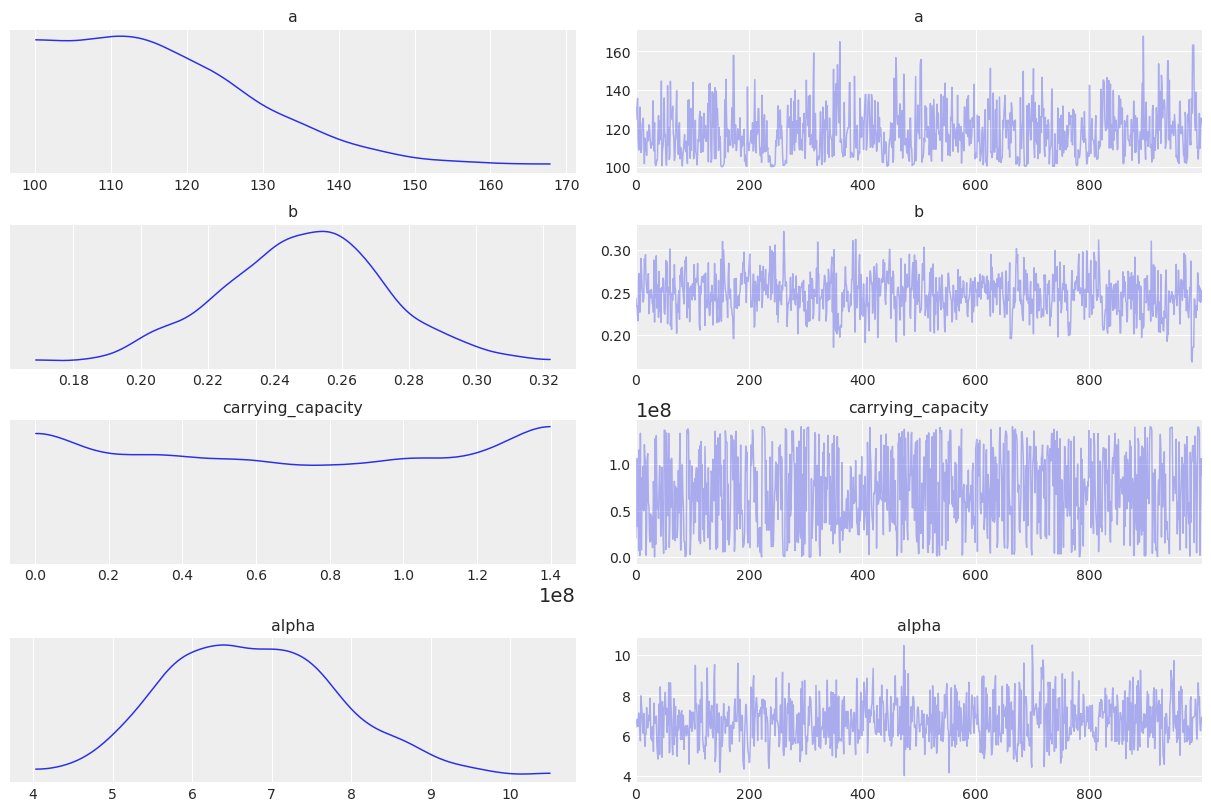

In [45]:
az.plot_trace(trace_logistic);

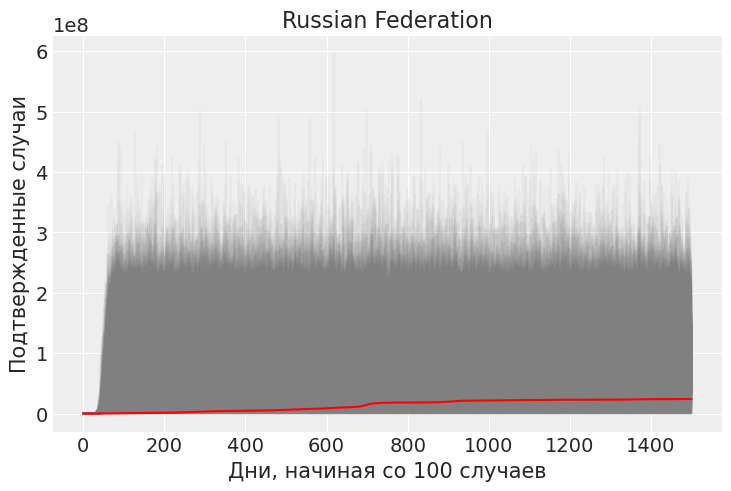

In [46]:
fig, ax = plt.subplots()
ax.plot(post_pred["obs"].squeeze().T, color="0.5", alpha=0.05)
ax.plot(df_confirmed_new.values, color="r")
ax.set(xlabel="Дни, начиная со 100 случаев", ylabel="Подтвержденные случаи", title=country);

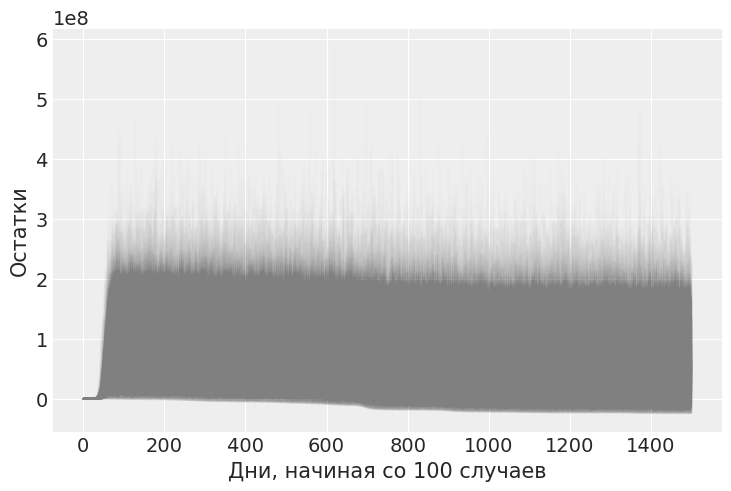

In [47]:
fig, ax = plt.subplots()
resid = post_pred["obs"].squeeze() - df_confirmed_new.values
ax.plot(resid.T, color="0.5", alpha=0.01)
ax.set(ylabel="Остатки", xlabel="Дни, начиная со 100 случаев");

В чем разница с остатками из предыдущей модели `model_exp4`?

#### Сравнение моделей

Чтобы численно сравнить наши модели, нам сначала нужно переоборудовать `model_exp4` с более длинными данными, которые у нас теперь есть:

In [48]:
with pm.Model() as model_exp4:
    t_data = pm.Data("t", df_country_new.index.values[:10])
    confirmed_data = pm.Data("confirmed", df_country_new.Cumulative_cases.values[:10])

    # Intercept
    intercept = pm.TruncatedNormal("a", mu=100, sigma=25, lower=100)

    # Slope
    b = pm.TruncatedNormal("b", mu=0.3, sigma=0.1, lower=0)

    carrying_capacity = pm.Uniform("carrying_capacity", lower=1_000, upper=140_000_000)
    # Transform carrying_capacity to a
    a = carrying_capacity / intercept - 1

    # Exponential regression
    growth = a * (1 + b) ** t_data

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed_data
    )

    prior_pred = pm.sample_prior_predictive()

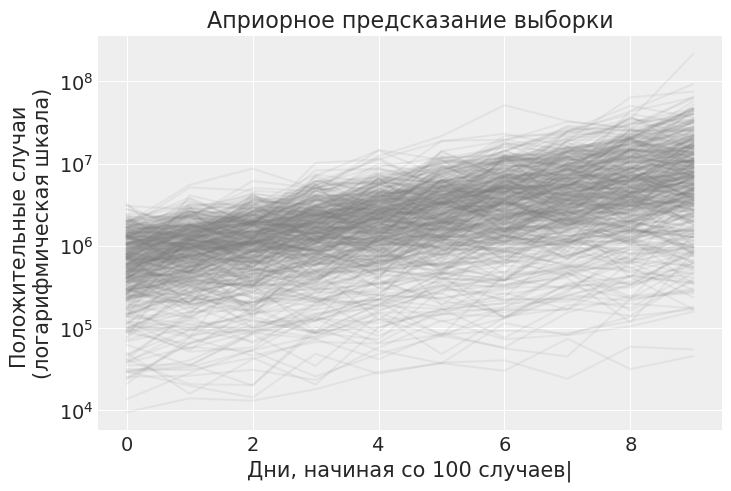

In [49]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    title="Априорное предсказание выборки",
    xlabel="Дни, начиная со 100 случаев|",
    ylabel="Положительные случаи \n(логарифмическая шкала)",
    yscale="log",
);

In [50]:
with model_exp4:
    # Inference
    _kwargs = sampler_kwargs()
    trace_exp4 = pm.sample(**_kwargs)
    post_pred_exp4 = pm.sample_posterior_predictive(trace_exp4)
    # Sample posterior predcitive
    azz_exp4 = az.from_pymc3(posterior_predictive=post_pred_exp4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, carrying_capacity, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


C:\Users\NightMare\anaconda3\envs\covid\lib\site-packages\arviz\stats\stats.py:147: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"


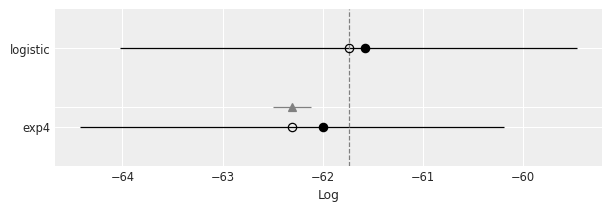

In [51]:
az.plot_compare(az.compare({"exp4": trace_exp4, "logistic": trace_logistic}));

Как вы можете видеть, логистическая модель обеспечивает гораздо лучшее соответствие данным.

Однако мы увидели, что в остатках все еще есть некоторое смещение. Давайте посмотрим, как логистическая модель себя покажет в другой стране:

In [52]:
country = "Italy"
df_country = df.loc[lambda x: (x['Country'] == country)].iloc[:]
df_confirmed = df_country.loc[lambda x: (x['Country'] == country), "Cumulative_cases"]

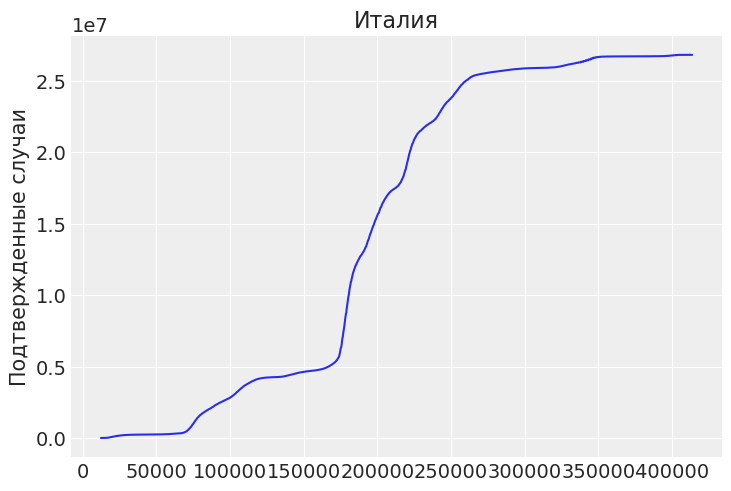

In [53]:
fig, ax = plt.subplots()
df_country.Cumulative_cases.plot(ax=ax)
ax.set(ylabel="Подтвержденные случаи", title="Италия");

Как вы видите, данные выглядят немного по-другому. Давайте посмотрим, как наша логистическая модель справляется с этим:

In [54]:
with pm.Model() as logistic_model:
    t_data = pm.Data("t", df_country.index.values[:10])
    confirmed_data = pm.Data("confirmed", df_country.Cumulative_cases.values[:10])

    # Intercept
    intercept = pm.TruncatedNormal("a", mu=100, sigma=50, lower=10)

    # Slope
    b = pm.TruncatedNormal("b", mu=0.3, sigma=0.1, lower=0)

    carrying_capacity = pm.Uniform("carrying_capacity", lower=1_000, upper=24_000_000)
    # Transform carrying_capacity to a
    a = carrying_capacity / intercept - 1

    # Logistic
    growth = carrying_capacity / (1 + a * pm.math.exp(-b * t_data))

    # Likelihood
    pm.NegativeBinomial(
        "obs", growth, alpha=pm.Gamma("alpha", mu=6, sigma=1), observed=confirmed_data
    )

    prior_pred = pm.sample_prior_predictive()

In [55]:
with logistic_model:
    # Inference
    _kwargs = sampler_kwargs()
    trace_logistic = pm.sample(**_kwargs)
    post_pred = pm.sample_posterior_predictive(trace_logistic)
    # Sample posterior predcitive
    azz = az.from_pymc3(posterior_predictive=post_pred)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, carrying_capacity, b, a]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


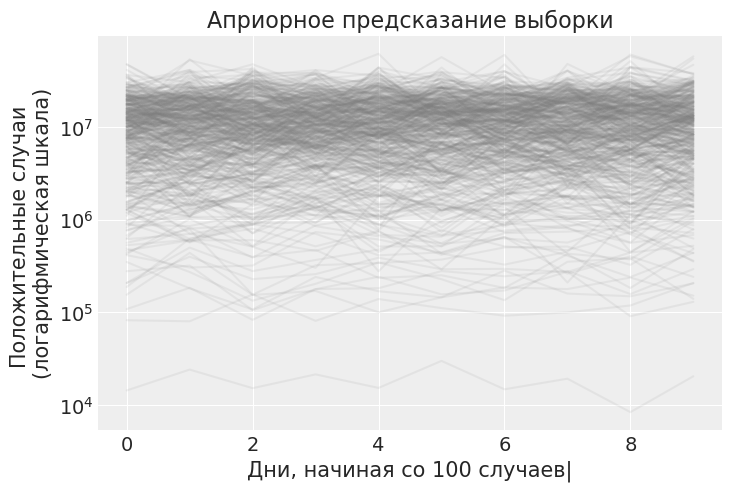

In [56]:
fig, ax = plt.subplots()
ax.plot(prior_pred["obs"].T, color="0.5", alpha=0.1)
ax.set(
    title="Априорное предсказание выборки",
    xlabel="Дни, начиная со 100 случаев|",
    ylabel="Положительные случаи \n(логарифмическая шкала)",
    yscale="log",
);

Мы уже видим некоторые проблемы с выборкой, которые должны вызвать у нас подозрения, что эта модель может быть не самой лучшей для этих данных.

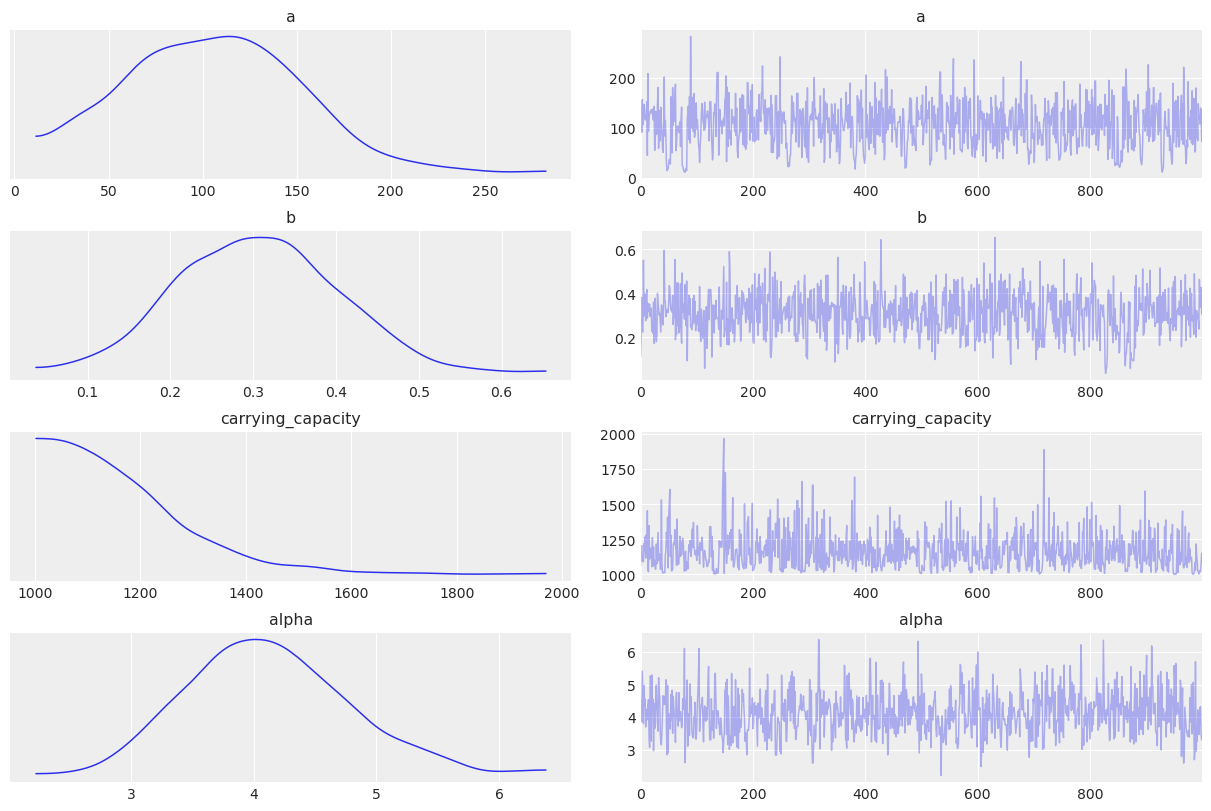

In [57]:
az.plot_trace(trace_logistic);

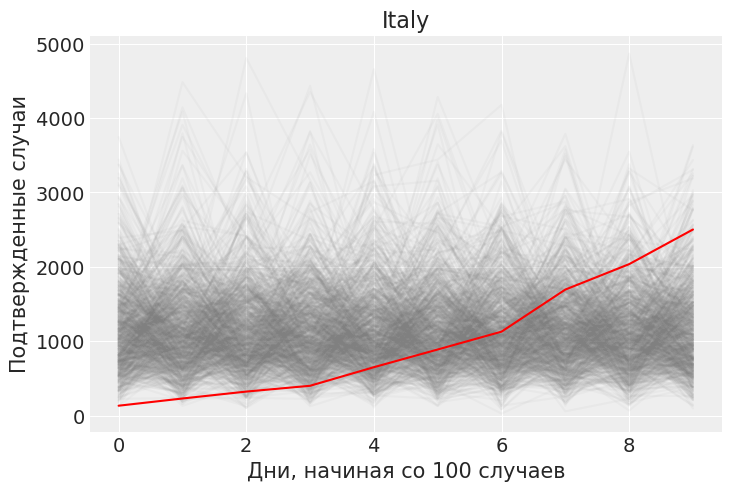

In [58]:
fig, ax = plt.subplots()
ax.plot(post_pred["obs"].squeeze().T, color="0.5", alpha=0.05)
ax.plot(df_confirmed.values[:10], color="r")
ax.set(xlabel="Дни, начиная со 100 случаев", ylabel="Подтвержденные случаи", title=country);

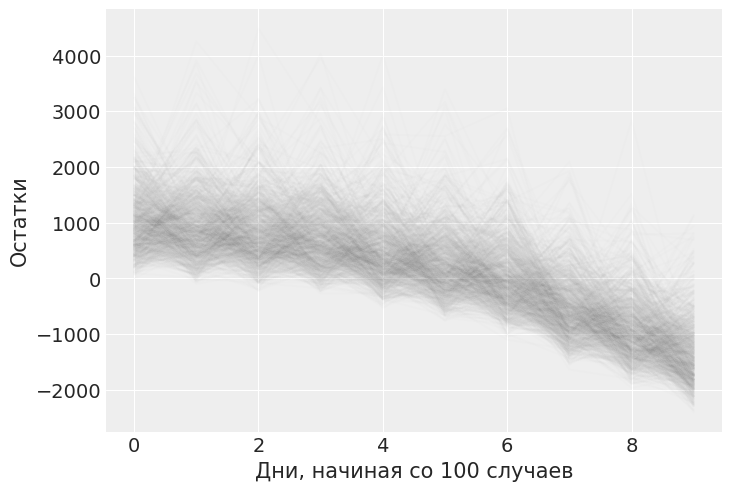

In [59]:
fig, ax = plt.subplots()
resid = post_pred["obs"].squeeze() - df_confirmed.values[:10]
ax.plot(resid.T, color="0.5", alpha=0.01)
ax.set(ylabel="Остатки", xlabel="Дни, начиная со 100 случаев");

Это подтверждает то, что мы думали: наша модель не так уж плоха, но и не великолепна — она не очень хорошо соответствует данным. Почему? Какие предположения делает модель о распространении COVID-19?

In [60]:
%load_ext watermark
%watermark -n -u -v -iv -w

pandas     1.1.5
platform   1.0.8
numpy      1.19.5
matplotlib 3.3.4
pymc3      3.10.0
seaborn    0.11.2
arviz      0.11.1
last updated: Wed Oct 30 2024 

CPython 3.6.15
IPython 7.16.1
watermark 2.0.2
